Day 1 

I) Implementation of different estimators 

In [49]:
import numpy as np
import pandas as pd
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import of SPY data

In [50]:
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

[*********************100%%**********************]  1 of 1 completed


Close to close estimator 

In [51]:
def close_to_close(data):
    data['Close-to-close'] = np.abs(np.log(data['Close'] / data['Close'].shift(1)))
    Close_to_close=data['Close-to-close']
    return Close_to_close

Parkinson estimator 

In [52]:
def Parkinson(data):
    Parkinson = np.sqrt(1 / (4 * np.log(2)) * np.log(data['High'] / data['Low']) ** 2)
    return Parkinson

Garman Klass estimator

In [53]:
def garman_klass__estimator(data):
    sigma_GK = 0.5 * (np.log(data['High']/data['Low']))**2 - (2*np.log(2)-1) * (np.log(data['Close']/data['Open']))**2
    sigma_GK = np.sqrt(sigma_GK)
    return sigma_GK

Roger Satchell estimator

In [54]:
def rogers_satchell_volatility(data):
    high = data['High']
    low = data['Low']
    close = data['Close']
    open = data['Open']

    log_hc = np.log(high / close)
    log_ho = np.log(high / open)
    log_lc = np.log(low / close)
    log_lo = np.log(low / open)

    sigma_rs = np.sqrt(log_hc * log_ho + log_lc * log_lo)
    return sigma_rs

Yang-Zhang estimator

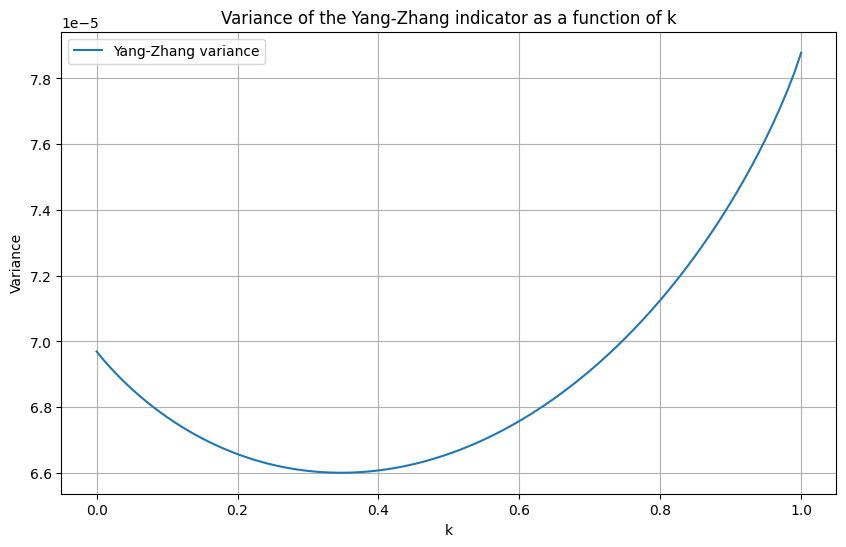

In [55]:

def calculate_yang_zhang(data, k):
    yang_zhang = np.sqrt(
        np.log(data['Open'] / data['Close'].shift(1)) ** 2
        + k * np.log(data['Close'] / data['Open']) ** 2
        + (1 - k) * (np.log(data['High'] / data['Close']) * np.log(data['High'] / data['Open'])
                  + np.log(data['Low'] / data['Close']) * np.log(data['Low'] / data['Open'])))
    
    return yang_zhang

# Variance of the Yang-Zhang indicator as a function of k
def plot_yang_zhang_variance(data):
    k_values = np.linspace(0, 1, 100)
    variances = []

    for k in k_values:
        yang_zhang = calculate_yang_zhang(data, k)
        variances.append(np.var(yang_zhang))

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, variances, label='Yang-Zhang variance')
    plt.xlabel('k')
    plt.ylabel('Variance')
    plt.title('Variance of the Yang-Zhang indicator as a function of k')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_yang_zhang_variance(data)

Graphs 

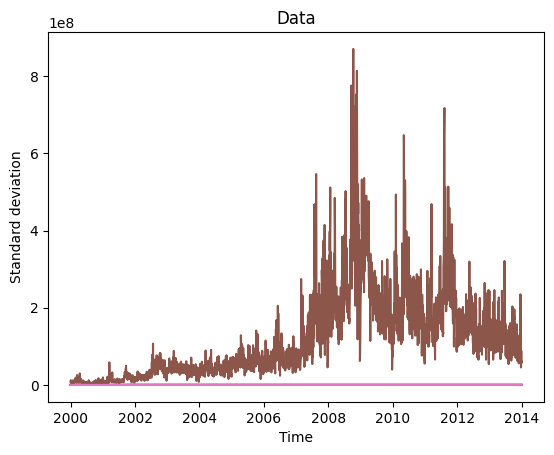

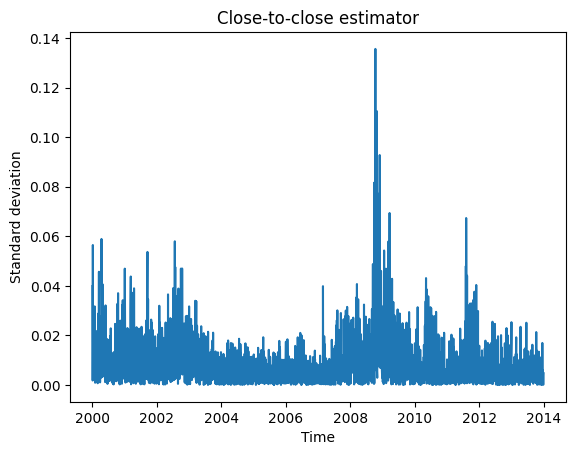

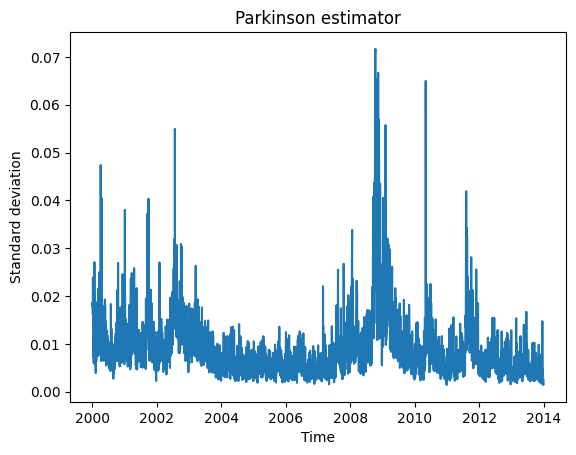

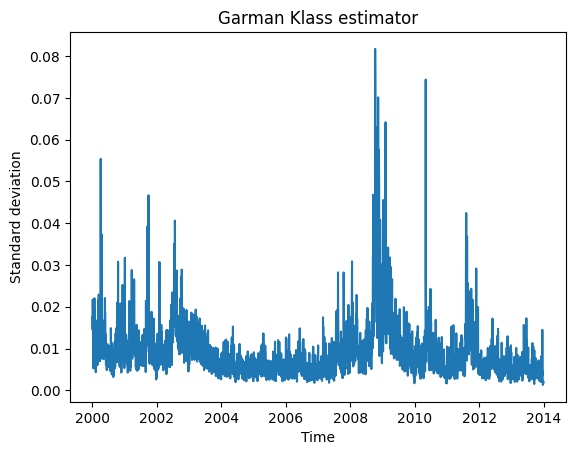

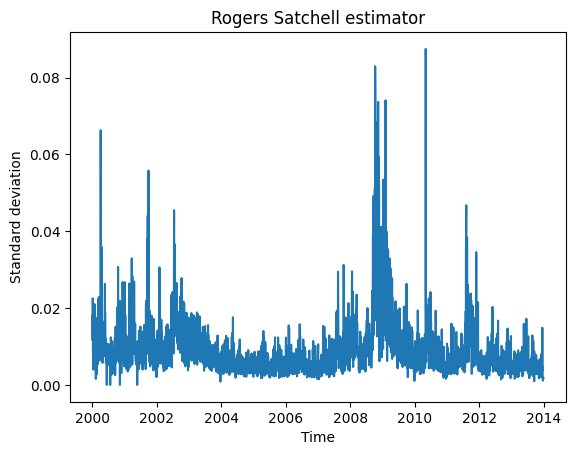

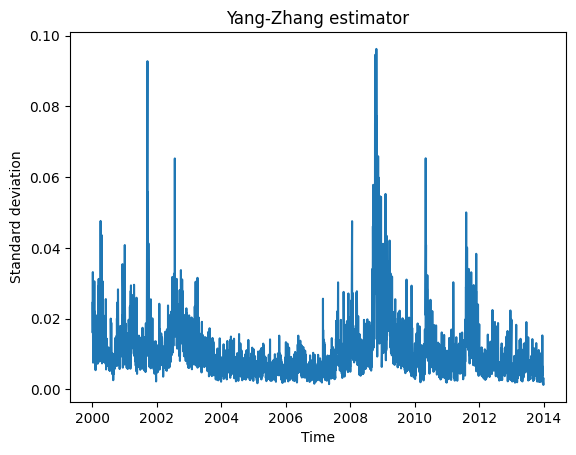

In [56]:
parkinson_data = Parkinson(data) 
garman_data = garman_klass__estimator(data) 
rogers_data = rogers_satchell_volatility(data) 
close_data = close_to_close(data) 

plt.plot(data)
plt.title('Data')
plt.xlabel('Time')
plt.ylabel('Standard deviation')
plt.show()

plt.plot(close_data)
plt.title('Close-to-close estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()


plt.plot(parkinson_data)
plt.title('Parkinson estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()


plt.plot(garman_data)
plt.title('Garman Klass estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()

plt.plot(rogers_data)
plt.title('Rogers Satchell estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()

yangzhang= calculate_yang_zhang(data,k=0.5)

plt.plot(yangzhang)
plt.title('Yang-Zhang estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()

II) Comparison between estimators 

Correlation matrix

In [57]:

k = 1

data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

A = pd.Series(close_to_close(data))
B = garman_klass__estimator(data)
C = pd.Series(Parkinson(data))
D = rogers_satchell_volatility(data)
E = calculate_yang_zhang(data, k)

estimators = [A,B,C,D,E]

for i, est in enumerate(estimators):
    if not isinstance(est, pd.Series):
        print(f"Estimator {i} is not a pandas Series.")
    if np.isinf(est).any():
        print(f"Estimator {i} contains infinite values.")

# Computing the correlation matrix
correlation_matrix = np.zeros((5,5))
for i in range(len(estimators)):
    for j in range(len(estimators)):
        correlation_value = estimators[i].corr(estimators[j])
        if not pd.isna(correlation_value):
            correlation_matrix[i, j] = correlation_value



labels = ['Close to close', 'Garman Klass', 'Parkinson', 'Roger Satchell', 'Yang Zhang']

df_correlation = pd.DataFrame(correlation_matrix, index=labels, columns=labels)

print(df_correlation)

[*********************100%%**********************]  1 of 1 completed

                Close to close  Garman Klass  Parkinson  Roger Satchell  \
Close to close        1.000000      0.621091   0.731183        0.522487   
Garman Klass          0.621091      1.000000   0.967018        0.979684   
Parkinson             0.731183      0.967018   1.000000        0.903025   
Roger Satchell        0.522487      0.979684   0.903025        1.000000   
Yang Zhang            0.848369      0.695364   0.828181        0.576099   

                Yang Zhang  
Close to close    0.848369  
Garman Klass      0.695364  
Parkinson         0.828181  
Roger Satchell    0.576099  
Yang Zhang        1.000000  


Correlation with true volatility

In [58]:

data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

true_volatility = data['Close'].rolling(window=30).std()

true_volatility = true_volatility.fillna(method='bfill')

[*********************100%%**********************]  1 of 1 completed


In [59]:

correlation_with_true_vol = np.zeros(5)

for i in range(len(correlation_with_true_vol)):
    correlation_with_true_vol[i] = estimators[i].corr(true_volatility)

df_corr_true_vol = pd.DataFrame([correlation_with_true_vol], columns=labels)

print("Correlation with True Volatility:\n", df_corr_true_vol)

Correlation with True Volatility:
    Close to close  Garman Klass  Parkinson  Roger Satchell  Yang Zhang
0        0.443313      0.622307   0.615934        0.597653    0.504924


Estimators efficiency

In [60]:

true_variance = true_volatility.var()

efficiency_vector = np.zeros(5)

for i in range(len(efficiency_vector)):
    efficiency_vector[i] = true_variance / estimators[i].var()

df_efficiency = pd.DataFrame([efficiency_vector], columns=labels)

print("Efficiency of Estimators:\n", df_efficiency)

Efficiency of Estimators:
    Close to close  Garman Klass     Parkinson  Roger Satchell    Yang Zhang
0    20253.973378  42809.182226  43364.971547    38638.508076  24670.783472


Monthly MSE of Volatility Estimators

In [61]:
data['Date'] = data.index
data['Month'] = data['Date'].dt.to_period('M')

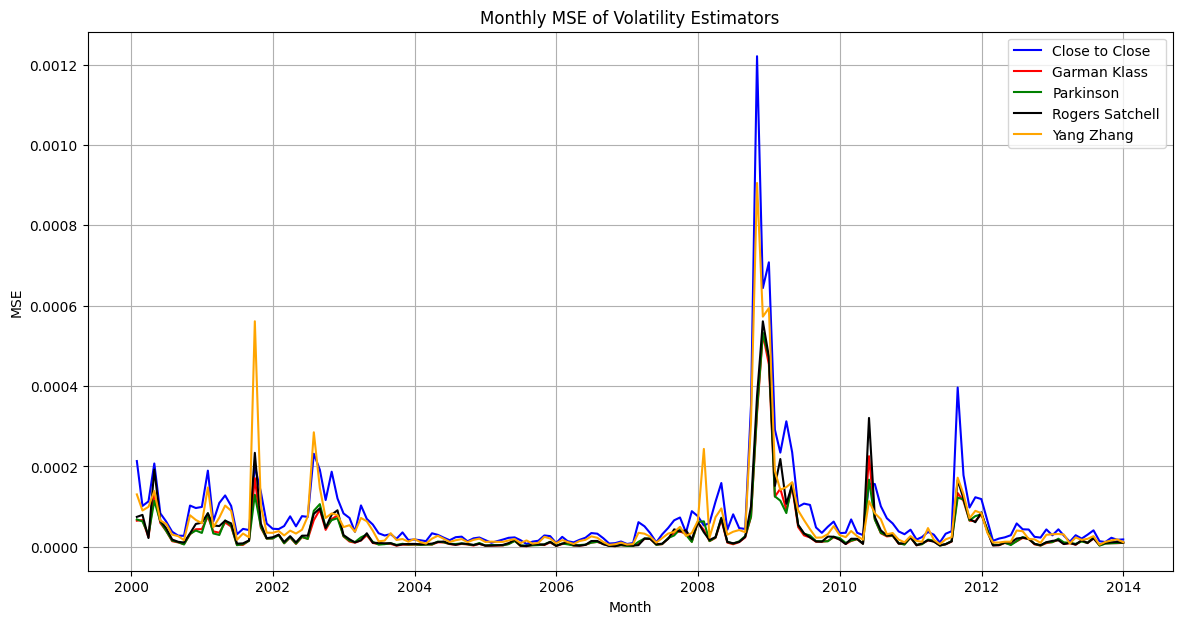

In [62]:

data.index = pd.to_datetime(data.index)


data['Estimator1'] = pd.Series(close_to_close(data))
data['Estimator2'] = pd.Series(garman_klass__estimator(data))
data['Estimator3'] = pd.Series(Parkinson(data))
data['Estimator4'] = pd.Series(rogers_satchell_volatility(data))
data['Estimator5'] = pd.Series(calculate_yang_zhang(data, k=1))


data['True_Volatility'] = data['Close'].pct_change().rolling(window=30).std()
data = data.fillna(method='bfill')


monthly_true_volatility = data['True_Volatility'].resample('M').mean()

# MSE
def calculate_monthly_mse(estimateur, true_volatility):
    return ((estimateur - true_volatility) ** 2).resample('M').mean()
monthly_mse = pd.DataFrame({
    'Estimator1': calculate_monthly_mse(data['Estimator1'], data['True_Volatility']),
    'Estimator2': calculate_monthly_mse(data['Estimator2'], data['True_Volatility']),
    'Estimator3': calculate_monthly_mse(data['Estimator3'], data['True_Volatility']),
    'Estimator4': calculate_monthly_mse(data['Estimator4'], data['True_Volatility']),
    'Estimator5': calculate_monthly_mse(data['Estimator5'], data['True_Volatility'])
})


plt.figure(figsize=(14, 7))


plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator1'].tolist(), label='Close to Close', color='blue')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator2'].tolist(), label='Garman Klass', color='red')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator3'].tolist(), label='Parkinson', color='green')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator4'].tolist(), label='Rogers Satchell', color='black')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator5'].tolist(), label='Yang Zhang', color='orange')

plt.title('Monthly MSE of Volatility Estimators')
plt.xlabel('Month')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

MSE distribution

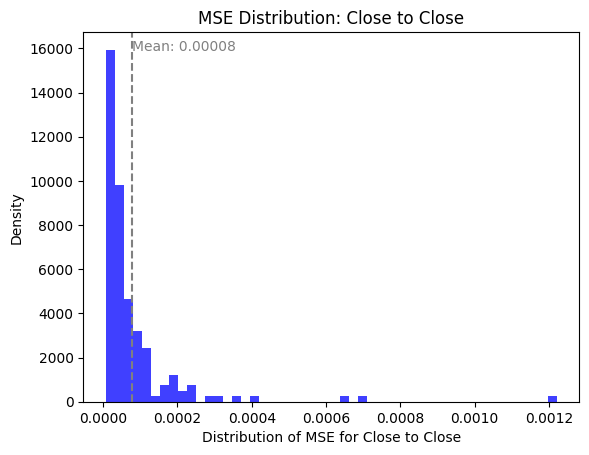

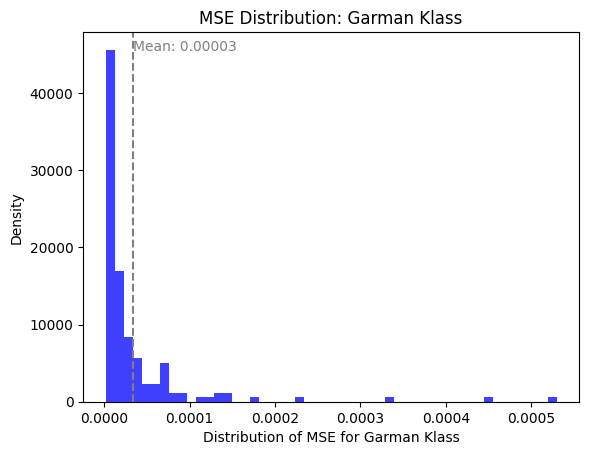

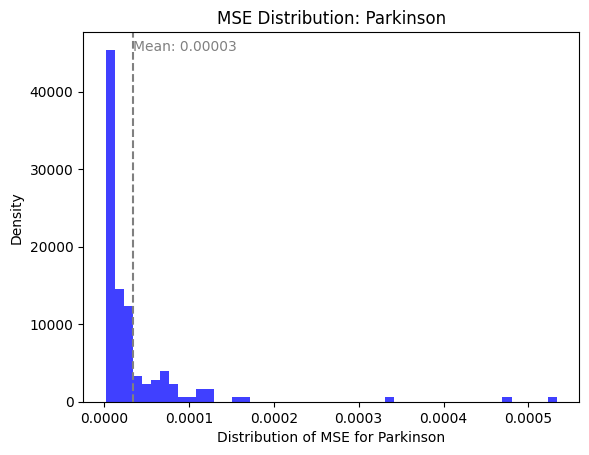

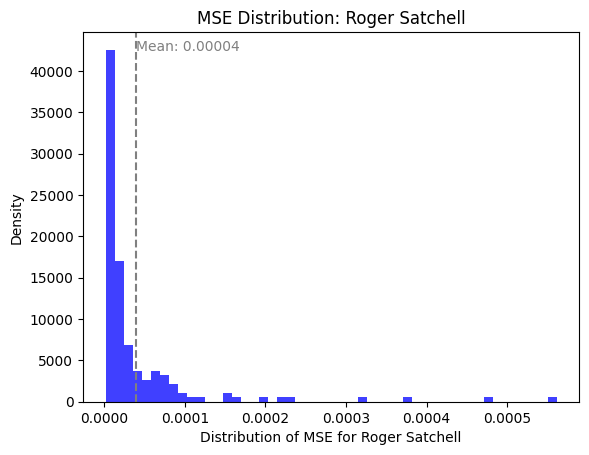

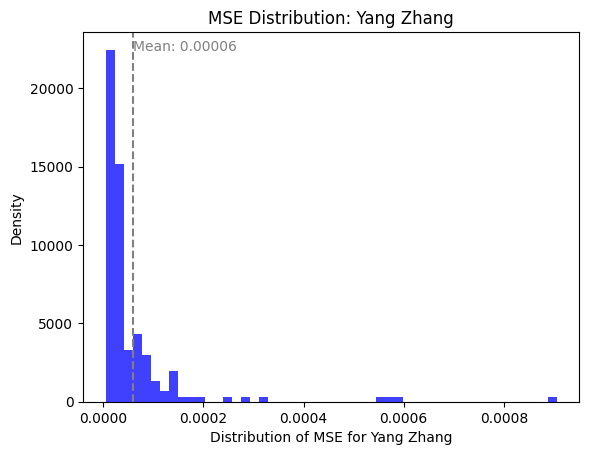

Estimators sorted from least to most biased based on MSE:
Garman Klass: 0.00003
Parkinson: 0.00003
Roger Satchell: 0.00004
Yang Zhang: 0.00006
Close to Close: 0.00008


In [63]:
import matplotlib.pyplot as plt

legends = ['Close to Close', 'Garman Klass', 'Parkinson', 'Roger Satchell', 'Yang Zhang']


mse_means = {}  

for i in range(1, 6):
    x = f'Estimator{i}'
    liste = monthly_mse[x].tolist()

    mean_mse = np.mean(liste)
    mse_means[legends[i-1]] = mean_mse
    
    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    plt.xlabel(f'Distribution of MSE for {legends[i-1]}')
    plt.ylabel('Density')
    plt.axvline(x=mean_mse, color='gray', linestyle='--')
    plt.text(mean_mse, plt.ylim()[1] * 0.95, f'Mean: {mean_mse:.5f}', color='gray', ha='left')
    plt.title(f'MSE Distribution: {legends[i-1]}')
    plt.show()

sorted_means = sorted(mse_means.items(), key=lambda item: item[1])
print("Estimators sorted from least to most biased based on MSE:")
for estimator, mse in sorted_means:
    print(f"{estimator}: {mse:.5f}")

Bias distribution

In [64]:
monthly_true_volatility = data['True_Volatility'].resample('M').mean()
data['True_Volatility'] = data['Close'].pct_change().rolling(window=30).std()

def calculate_monthly_mean(estimateur):
    return estimateur.resample('M').mean()

def calculate_monthly_bias(estimator, true_volatility):
    return (true_volatility-calculate_monthly_mean(estimator))

monthly_bias = pd.DataFrame({
    'Estimator1': calculate_monthly_bias(data['Estimator1'], data['True_Volatility']),
    'Estimator2': calculate_monthly_bias(data['Estimator2'], data['True_Volatility']),
    'Estimator3': calculate_monthly_bias(data['Estimator3'], data['True_Volatility']),
    'Estimator4': calculate_monthly_bias(data['Estimator4'], data['True_Volatility']),
    'Estimator5': calculate_monthly_bias(data['Estimator5'], data['True_Volatility'])
})

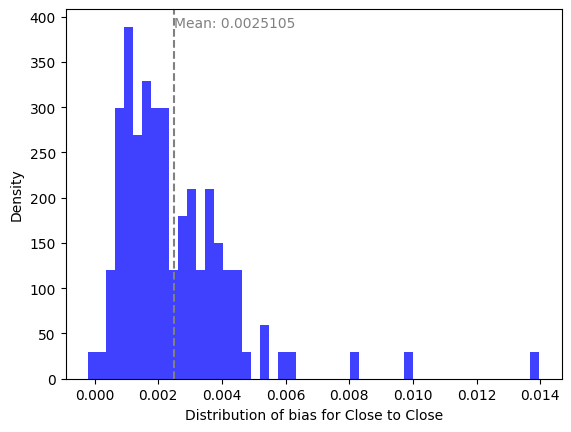

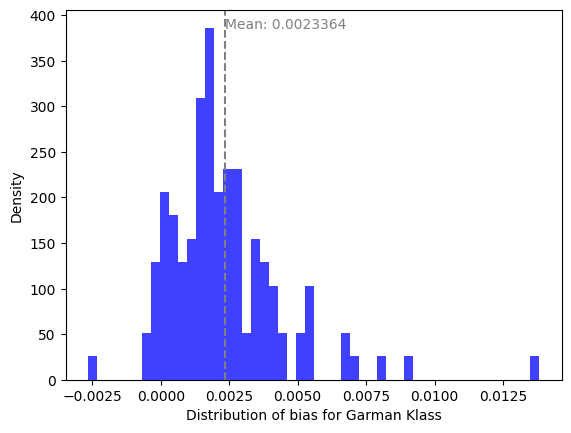

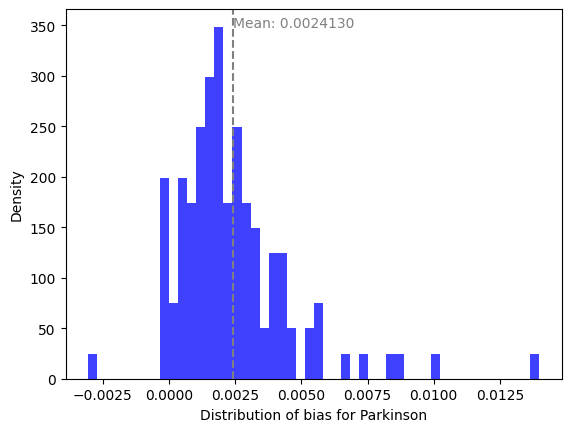

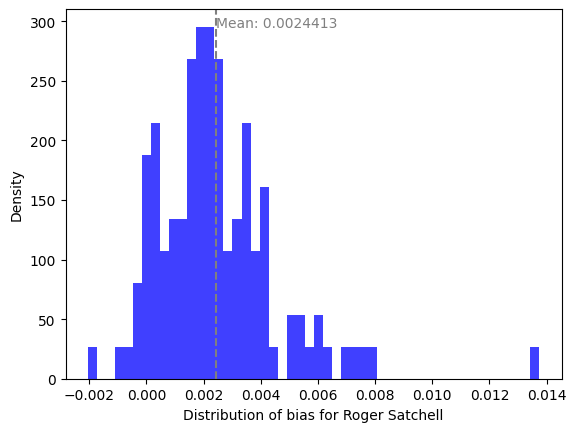

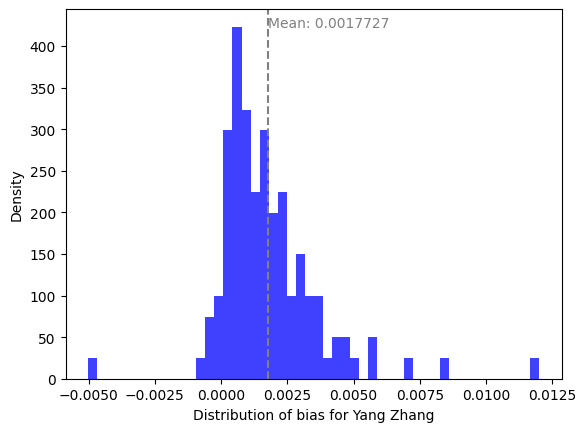

Estimators sorted from least to most biased based on MSE:
Yang Zhang: 0.0017727
Garman Klass: 0.0023364
Parkinson: 0.0024130
Roger Satchell: 0.0024413
Close to Close: 0.0025105


In [65]:
import matplotlib.pyplot as plt

bias_means = {}

for i in range (1,6):

    x = f'Estimator{i}'
    liste = monthly_bias[x].tolist()
    bias_means[legends[i-1]] = np.nanmean(liste)

    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.xlabel(f'Distribution of bias for {legends[i-1]}')
    plt.ylabel('Density')
    plt.axvline(x=np.nanmean(liste),color='gray',linestyle='--')
    plt.text(np.nanmean(liste), plt.ylim()[1] * 0.95, f'Mean: {np.nanmean(liste):.7f}', color='gray', ha='left')
    plt.show()

sorted_estimators = sorted(bias_means.items(), key=lambda item: item[1])


print("Estimators sorted from least to most biased based on MSE:")
for estimator, bias in sorted_estimators:
    print(f"{estimator}: {bias:.7f}")

Visualization of Mean Variance Ratios between estimator pairs

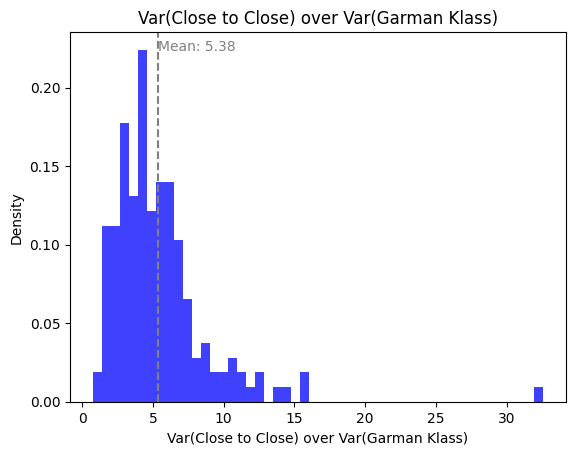

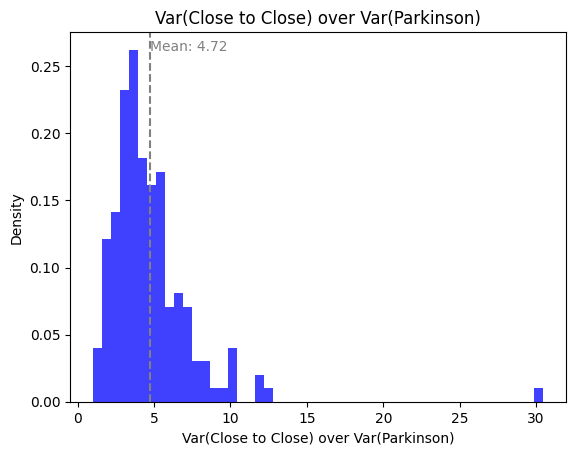

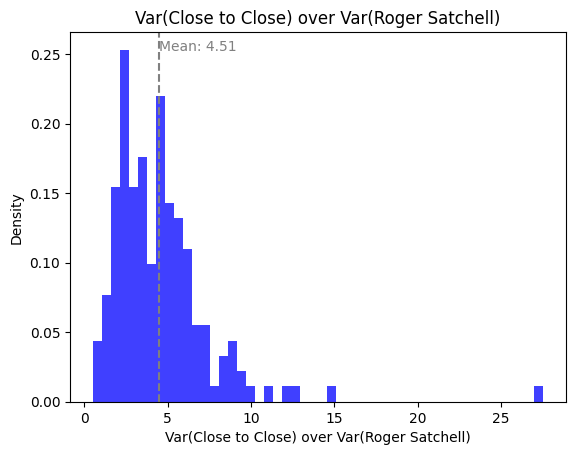

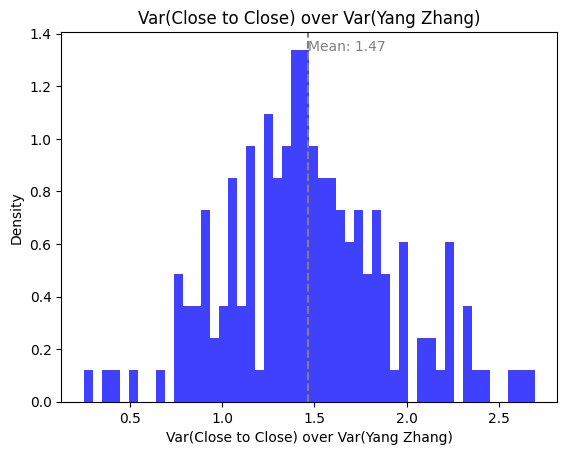

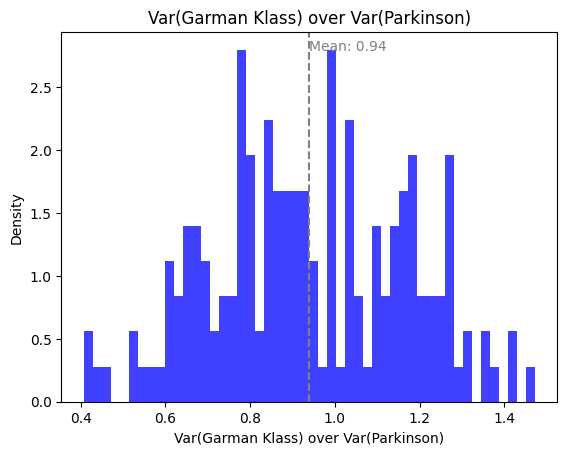

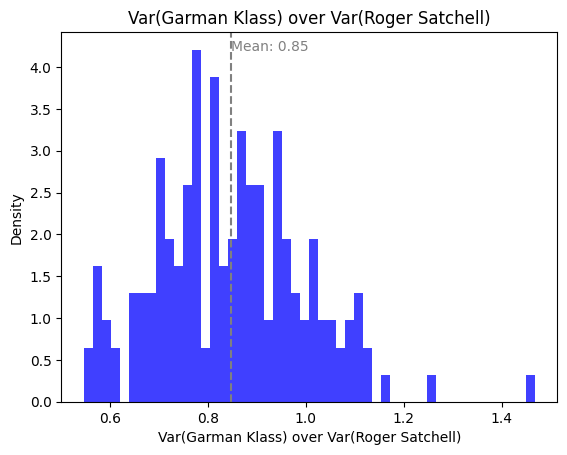

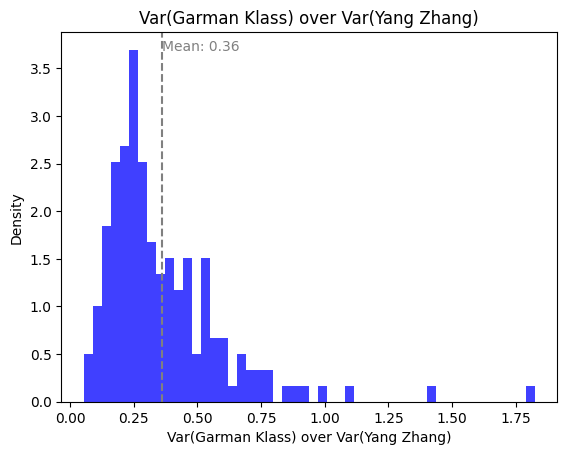

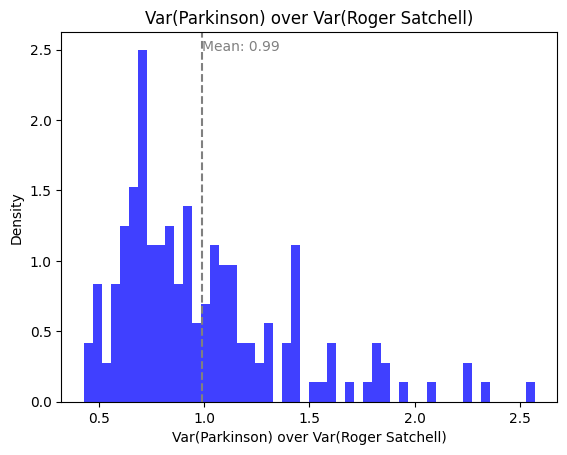

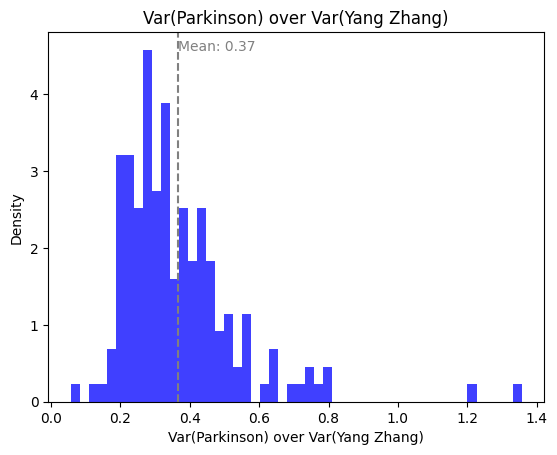

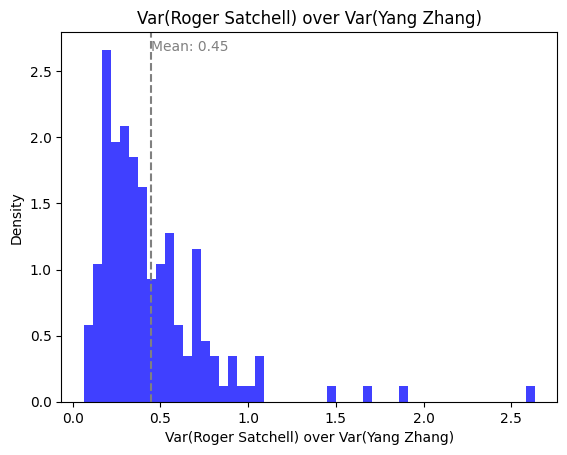

Var(Garman Klass) over Var(Yang Zhang): 0.36
Var(Parkinson) over Var(Yang Zhang): 0.37
Var(Roger Satchell) over Var(Yang Zhang): 0.45
Var(Garman Klass) over Var(Roger Satchell): 0.85
Var(Garman Klass) over Var(Parkinson): 0.94
Var(Parkinson) over Var(Roger Satchell): 0.99
Var(Close to Close) over Var(Yang Zhang): 1.47
Var(Close to Close) over Var(Roger Satchell): 4.51
Var(Close to Close) over Var(Parkinson): 4.72
Var(Close to Close) over Var(Garman Klass): 5.38


In [66]:
def calculate_monthly_var(estimator):
    return estimator.resample('M').var()

monthly_var = pd.DataFrame({
    'Estimator1': calculate_monthly_var(data['Estimator1']),
    'Estimator2': calculate_monthly_var(data['Estimator2']),
    'Estimator3': calculate_monthly_var(data['Estimator3']),
    'Estimator4': calculate_monthly_var(data['Estimator4']),
    'Estimator5': calculate_monthly_var(data['Estimator5'])
})

div = lambda l1, l2: [l1[k]/l2[k] for k in range(len(l1))]

variance_ratios_means = {}

for i in range(1, 6):
    for j in range(i+1, 6):
        x = f'Estimator{i}'
        y = f'Estimator{j}'
        liste_x = monthly_var[x].tolist()
        liste_y = monthly_var[y].tolist()
        ratio_list = div(liste_x, liste_y)

        mean_ratio = np.nanmean(ratio_list)
        key_name = f'Var({legends[i-1]}) over Var({legends[j-1]})'
        variance_ratios_means[key_name] = mean_ratio
        
        density, bins, _ = plt.hist(ratio_list, bins=50, alpha=0.75, color='blue', density=True)
        plt.xlabel(key_name)
        plt.ylabel('Density')
        plt.axvline(x=mean_ratio, color='gray', linestyle='--')
        plt.text(mean_ratio, plt.ylim()[1] * 0.95, f'Mean: {mean_ratio:.2f}', color='gray', ha='left')
        plt.title(key_name)
        plt.show()

sorted_means = sorted(variance_ratios_means.items(), key=lambda item: item[1])
for name, mean in sorted_means:
    print(f"{name}: {mean:.2f}")

Variance distribution

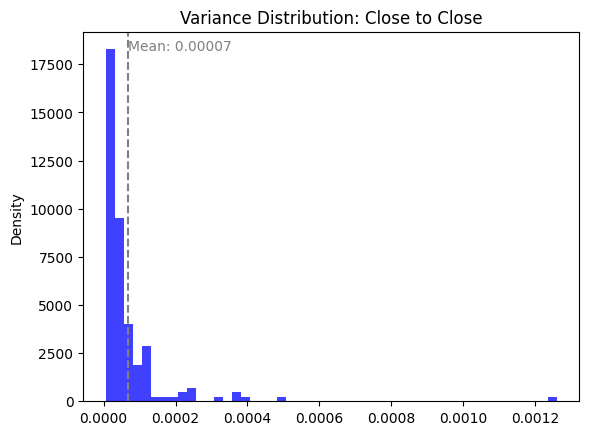

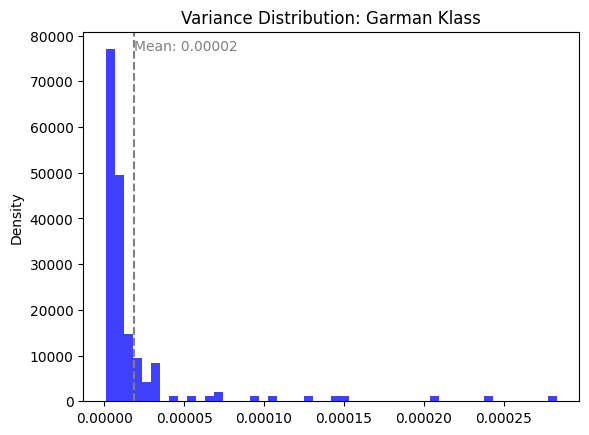

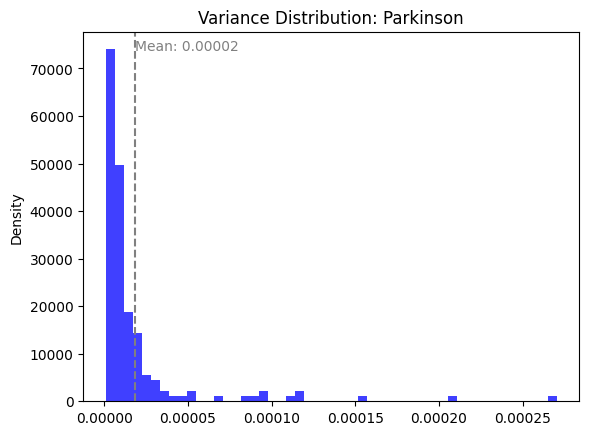

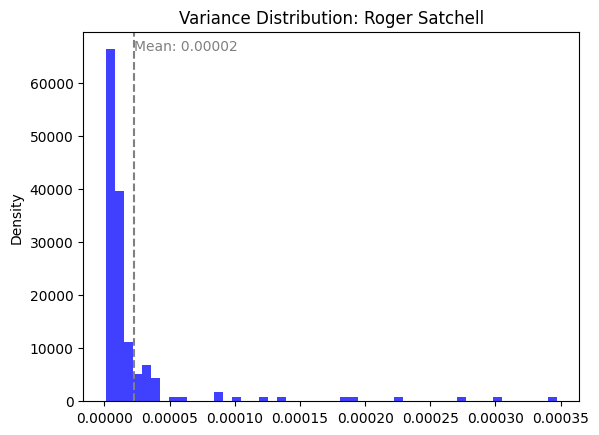

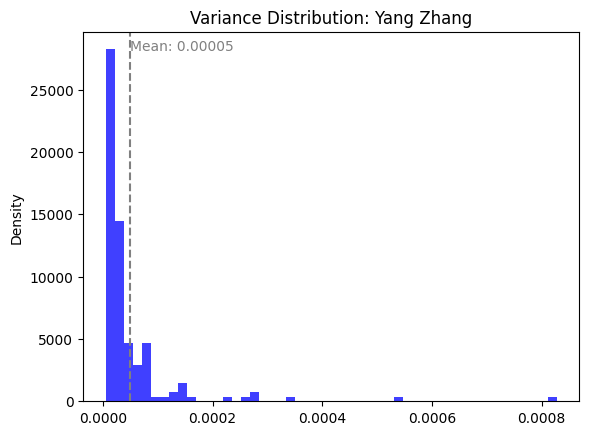

Parkinson: 0.00002
Garman Klass: 0.00002
Roger Satchell: 0.00002
Yang Zhang: 0.00005
Close to Close: 0.00007


In [67]:
var_means = {}  

for i in range(1, 6):
    x = f'Estimator{i}'
    liste = monthly_var[x].tolist()

    mean_var = np.mean(liste)
    var_means[legends[i-1]] = mean_var  
    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    plt.ylabel('Density')
    plt.axvline(x=mean_var, color='gray', linestyle='--')
    plt.text(mean_var, plt.ylim()[1] * 0.95, f'Mean: {mean_var:.5f}', color='gray', ha='left')
    plt.title(f'Variance Distribution: {legends[i-1]}')
    plt.show()

sorted_means = sorted(var_means.items(), key=lambda item: item[1])
for estimator, variance in sorted_means:
    print(f"{estimator}: {variance:.5f}")

III) Garch model

Garch prediction

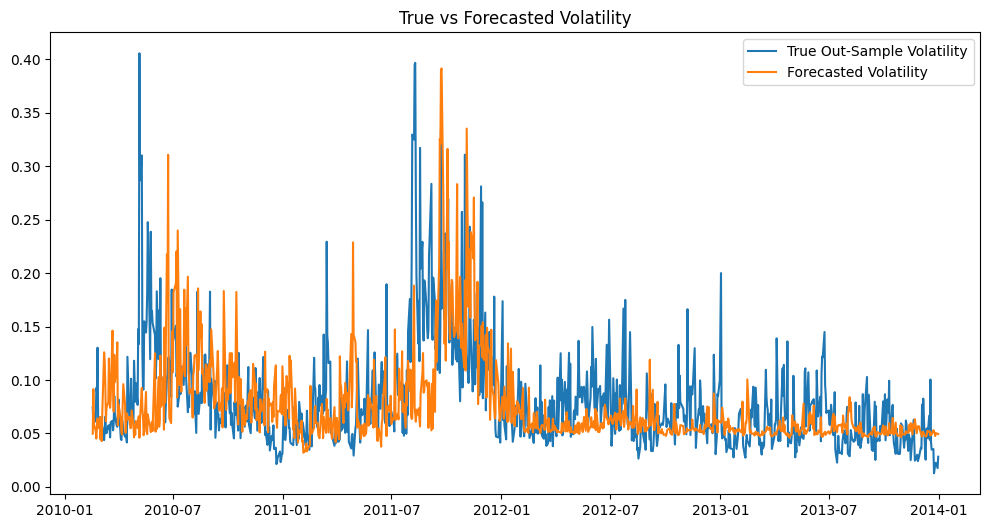

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('RealizedVarianceData.csv', low_memory=False)

data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'], errors='coerce')
data = data.dropna(subset=['Unnamed: 0', 'Realized Variance (5-minute)'])

data['Realized Variance (5-minute)'] = pd.to_numeric(data['Realized Variance (5-minute)'], errors='coerce')
data = data.dropna(subset=['Realized Variance (5-minute)'])

data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data.set_index('Date', inplace=True)

data['Realized Volatility (5-minute)'] = np.sqrt(data['Realized Variance (5-minute)']*100)

split_date = '2010-01-01'
in_sample = data.loc[:split_date]
out_sample = data.loc[split_date:]

a=1
b=0
# Rolling window forecast
window_size = 30  
forecasts = []

for start in range(len(out_sample) - window_size):
    end = start + window_size
    train_data = pd.concat([in_sample['Realized Volatility (5-minute)'], out_sample['Realized Volatility (5-minute)'][:start]])
    
    # Fit the GARCH model
    model = arch_model(train_data, vol='Garch', p=a, q=b)
    model_fit = model.fit(disp='off')
    if b==0:    
       model_fit.params['beta[1]']=0
    last_volatility = train_data.iloc[-1]
    forecast_variance = model_fit.params['omega'] + model_fit.params['alpha[1]'] * (last_volatility ** 2) + model_fit.params['beta[1]'] * model_fit.conditional_volatility[-1] ** 2
    forecast_volatility = np.sqrt(forecast_variance)
    forecasts.append(forecast_volatility)

forecasts = pd.Series(forecasts, index=out_sample.index[window_size:])

plt.figure(figsize=(12, 6))
plt.plot(out_sample.index[window_size:], out_sample['Realized Volatility (5-minute)'][window_size:], label='True Out-Sample Volatility')
plt.plot(forecasts.index, forecasts, label='Forecasted Volatility')
plt.legend()
plt.title('True vs Forecasted Volatility')
plt.show()

Garch study

[*********************100%%**********************]  1 of 1 completed


    Model  p  q   Avg_MSE
0   GARCH  1  1  0.000069
1   GARCH  1  2  0.044667
2   GARCH  1  3  0.000053
3   GARCH  2  1  0.000686
4   GARCH  2  2  0.000066
5   GARCH  2  3  0.000066
6   GARCH  3  1  0.001861
7   GARCH  3  2  0.000072
8   GARCH  3  3  0.000069
9    ARCH  1  0  0.000051
10   ARCH  2  0  0.000054
11   ARCH  3  0  0.000056


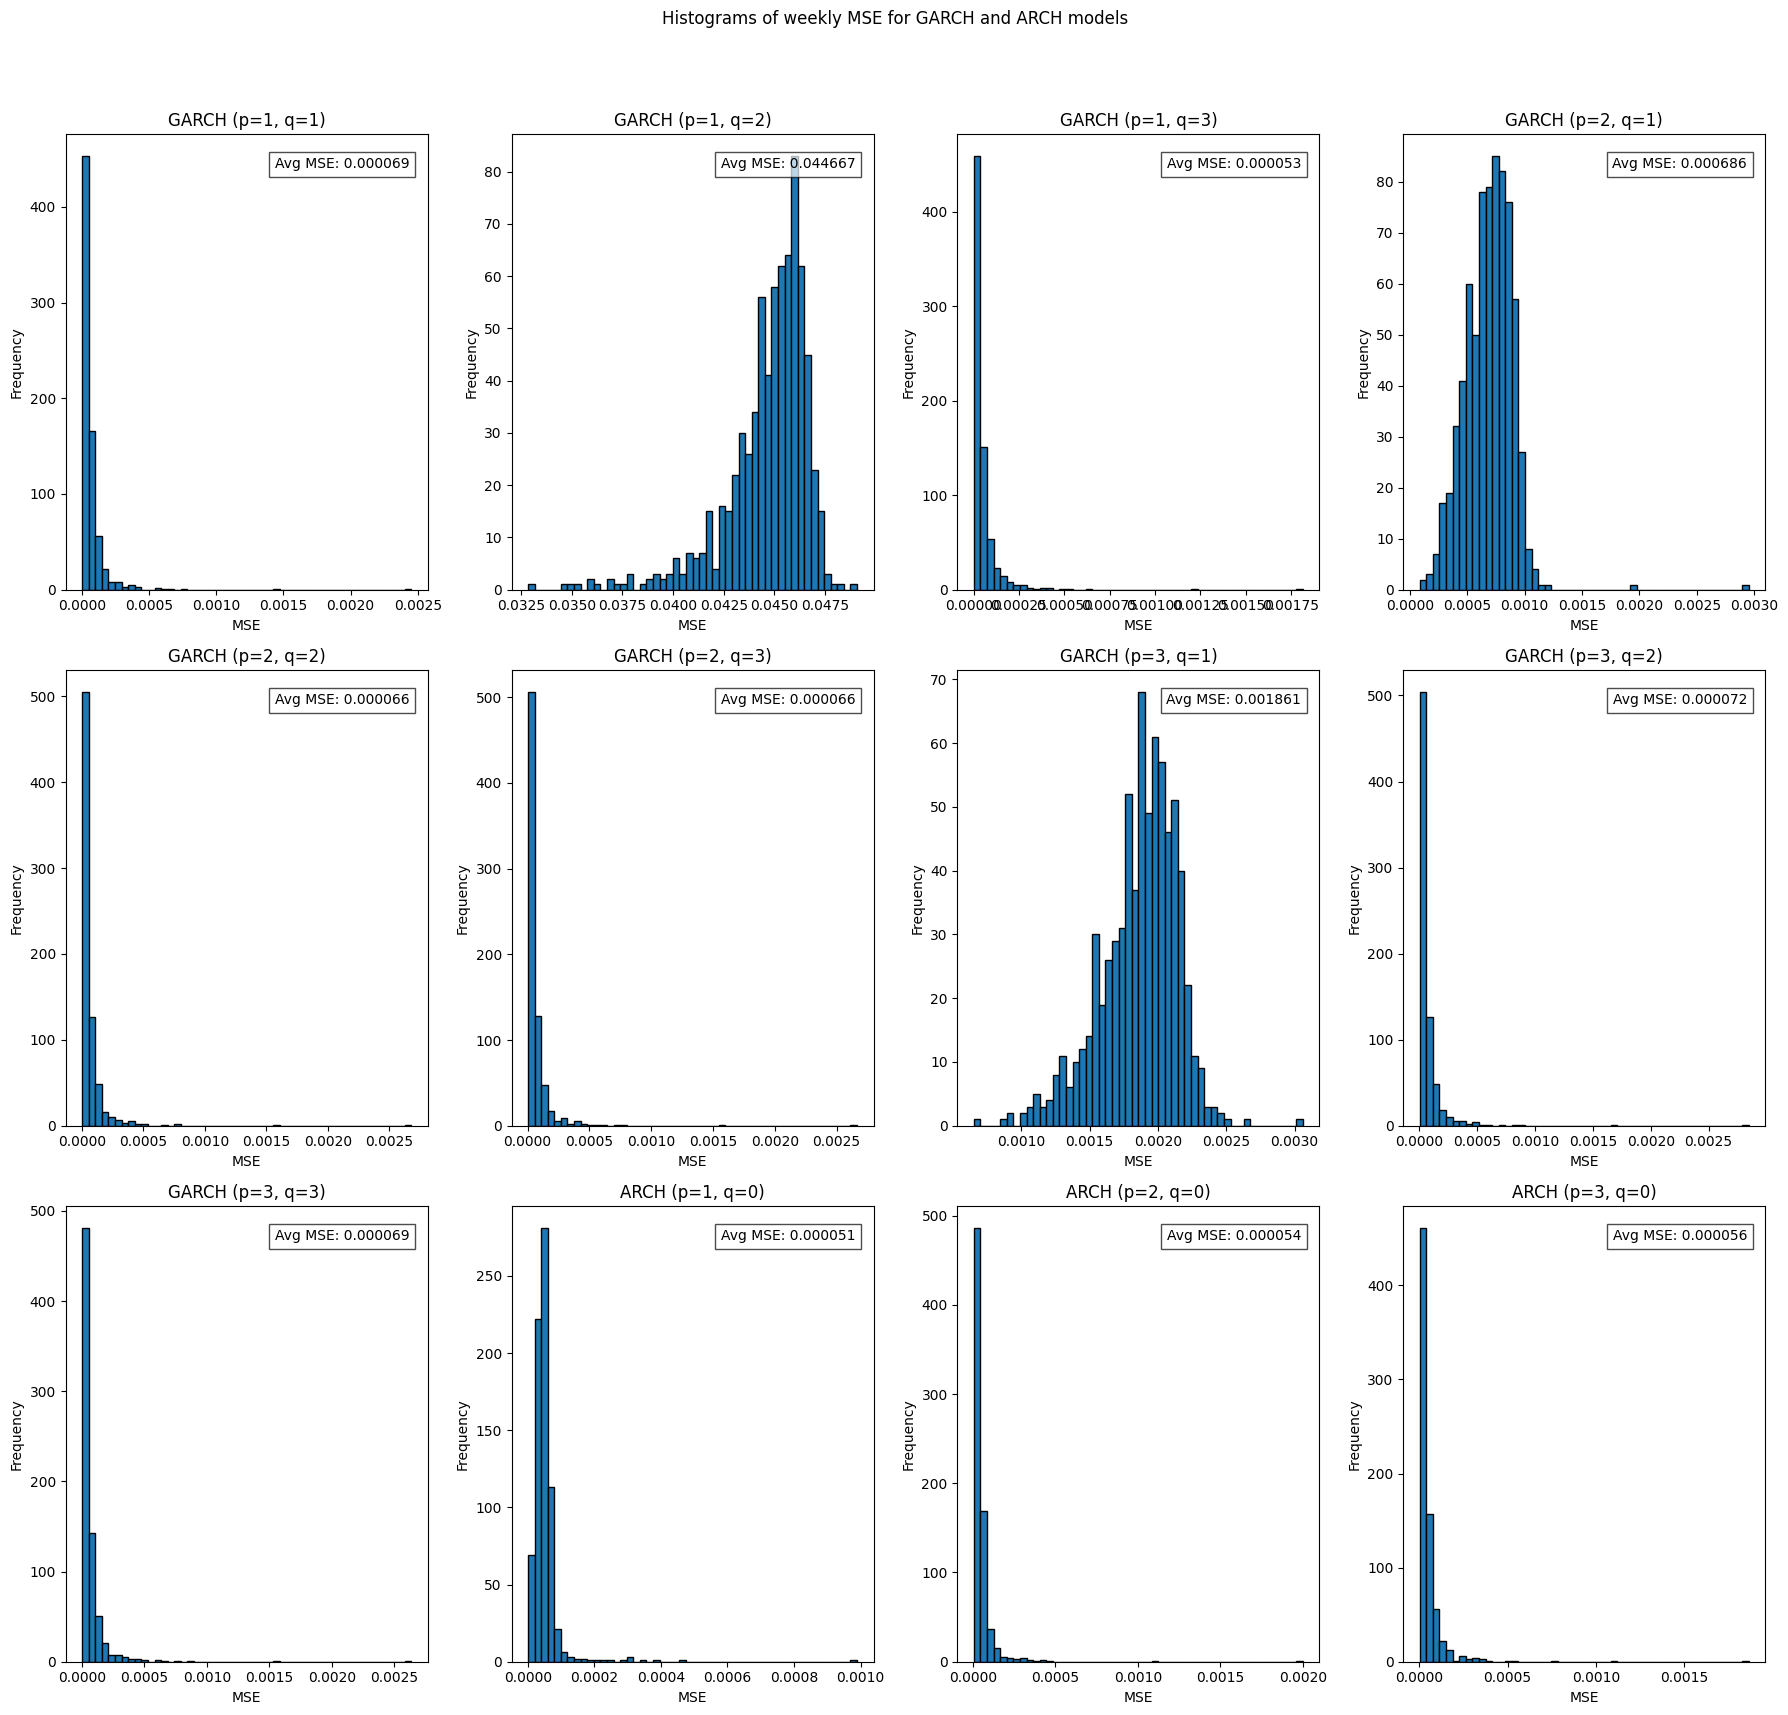

In [69]:
from arch import arch_model
warnings.filterwarnings("ignore")
def download_data(ticker='SPY', start='2000-01-01', end='2013-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close']]
    return data

# GARCH
def apply_garch_model(log_returns, p, q):
    p, q = int(p), int(q)
    model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# ARCH
def apply_arch_model(log_returns, p):
    p = int(p)
    model = arch_model(log_returns, vol='ARCH', p=p, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# MSE
def calculate_weekly_mse(realized_vol, predicted_vol):
    mse_weekly = ((realized_vol - predicted_vol) ** 2).resample('W').mean()
    return mse_weekly

if __name__ == "__main__":
    data = download_data()
    
    log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
    
    realized_vol = log_returns.abs()

    results = []

    # GARCH for p, q in [1, 2, 3]
    for p in range(1, 4):
        for q in range(1, 4):
            predicted_vol_garch = apply_garch_model(log_returns, p, q)
            predicted_vol_garch = predicted_vol_garch[-len(realized_vol):]
            mse_weekly_garch = calculate_weekly_mse(realized_vol, predicted_vol_garch)
            avg_mse_garch = mse_weekly_garch.mean()
            results.append(('GARCH', p, q, avg_mse_garch))

    # ARCH for p in [1, 2, 3]
    for p in range(1, 4):
        predicted_vol_arch = apply_arch_model(log_returns, p)
        predicted_vol_arch = predicted_vol_arch[-len(realized_vol):]
        mse_weekly_arch = calculate_weekly_mse(realized_vol, predicted_vol_arch)
        avg_mse_arch = mse_weekly_arch.mean()
        results.append(('ARCH', p, 0, avg_mse_arch)) 

    results_df = pd.DataFrame(results, columns=['Model', 'p', 'q', 'Avg_MSE'])
    
    print(results_df)

    num_models = len(results_df)
    num_cols = 4
    num_rows = (num_models + num_cols - 1) // num_cols 

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
    fig.suptitle('Histograms of weekly MSE for GARCH and ARCH models')

    for index, (model, p, q, avg_mse) in enumerate(results):
        if model == 'GARCH':
            predicted_vol = apply_garch_model(log_returns, p, q)
        else:
            predicted_vol = apply_arch_model(log_returns, p)
        
        predicted_vol = predicted_vol[-len(realized_vol):]
        mse_weekly = calculate_weekly_mse(realized_vol, predicted_vol)
        
        ax = axs[index // num_cols, index % num_cols]
        ax.hist(mse_weekly.dropna(), bins=50, edgecolor='black')
        ax.set_title(f'{model} (p={p}, q={q})')
        ax.set_xlabel('MSE')
        ax.set_ylabel('Frequency')
        ax.text(0.95, 0.95, f'Avg MSE: {avg_mse:.6f}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Arch and garch bias

[*********************100%%**********************]  1 of 1 completed


    Model  p  q  Avg_Weekly_Bias
0   GARCH  1  1         0.000066
1   GARCH  1  2         0.000066
2   GARCH  1  3         0.000065
3   GARCH  2  1         0.000066
4   GARCH  2  2         0.000066
5   GARCH  2  3         0.000066
6   GARCH  3  1         0.000066
7   GARCH  3  2         0.000066
8   GARCH  3  3         0.000067
9    ARCH  1  0         0.000056
10   ARCH  2  0         0.000056
11   ARCH  3  0         0.000060


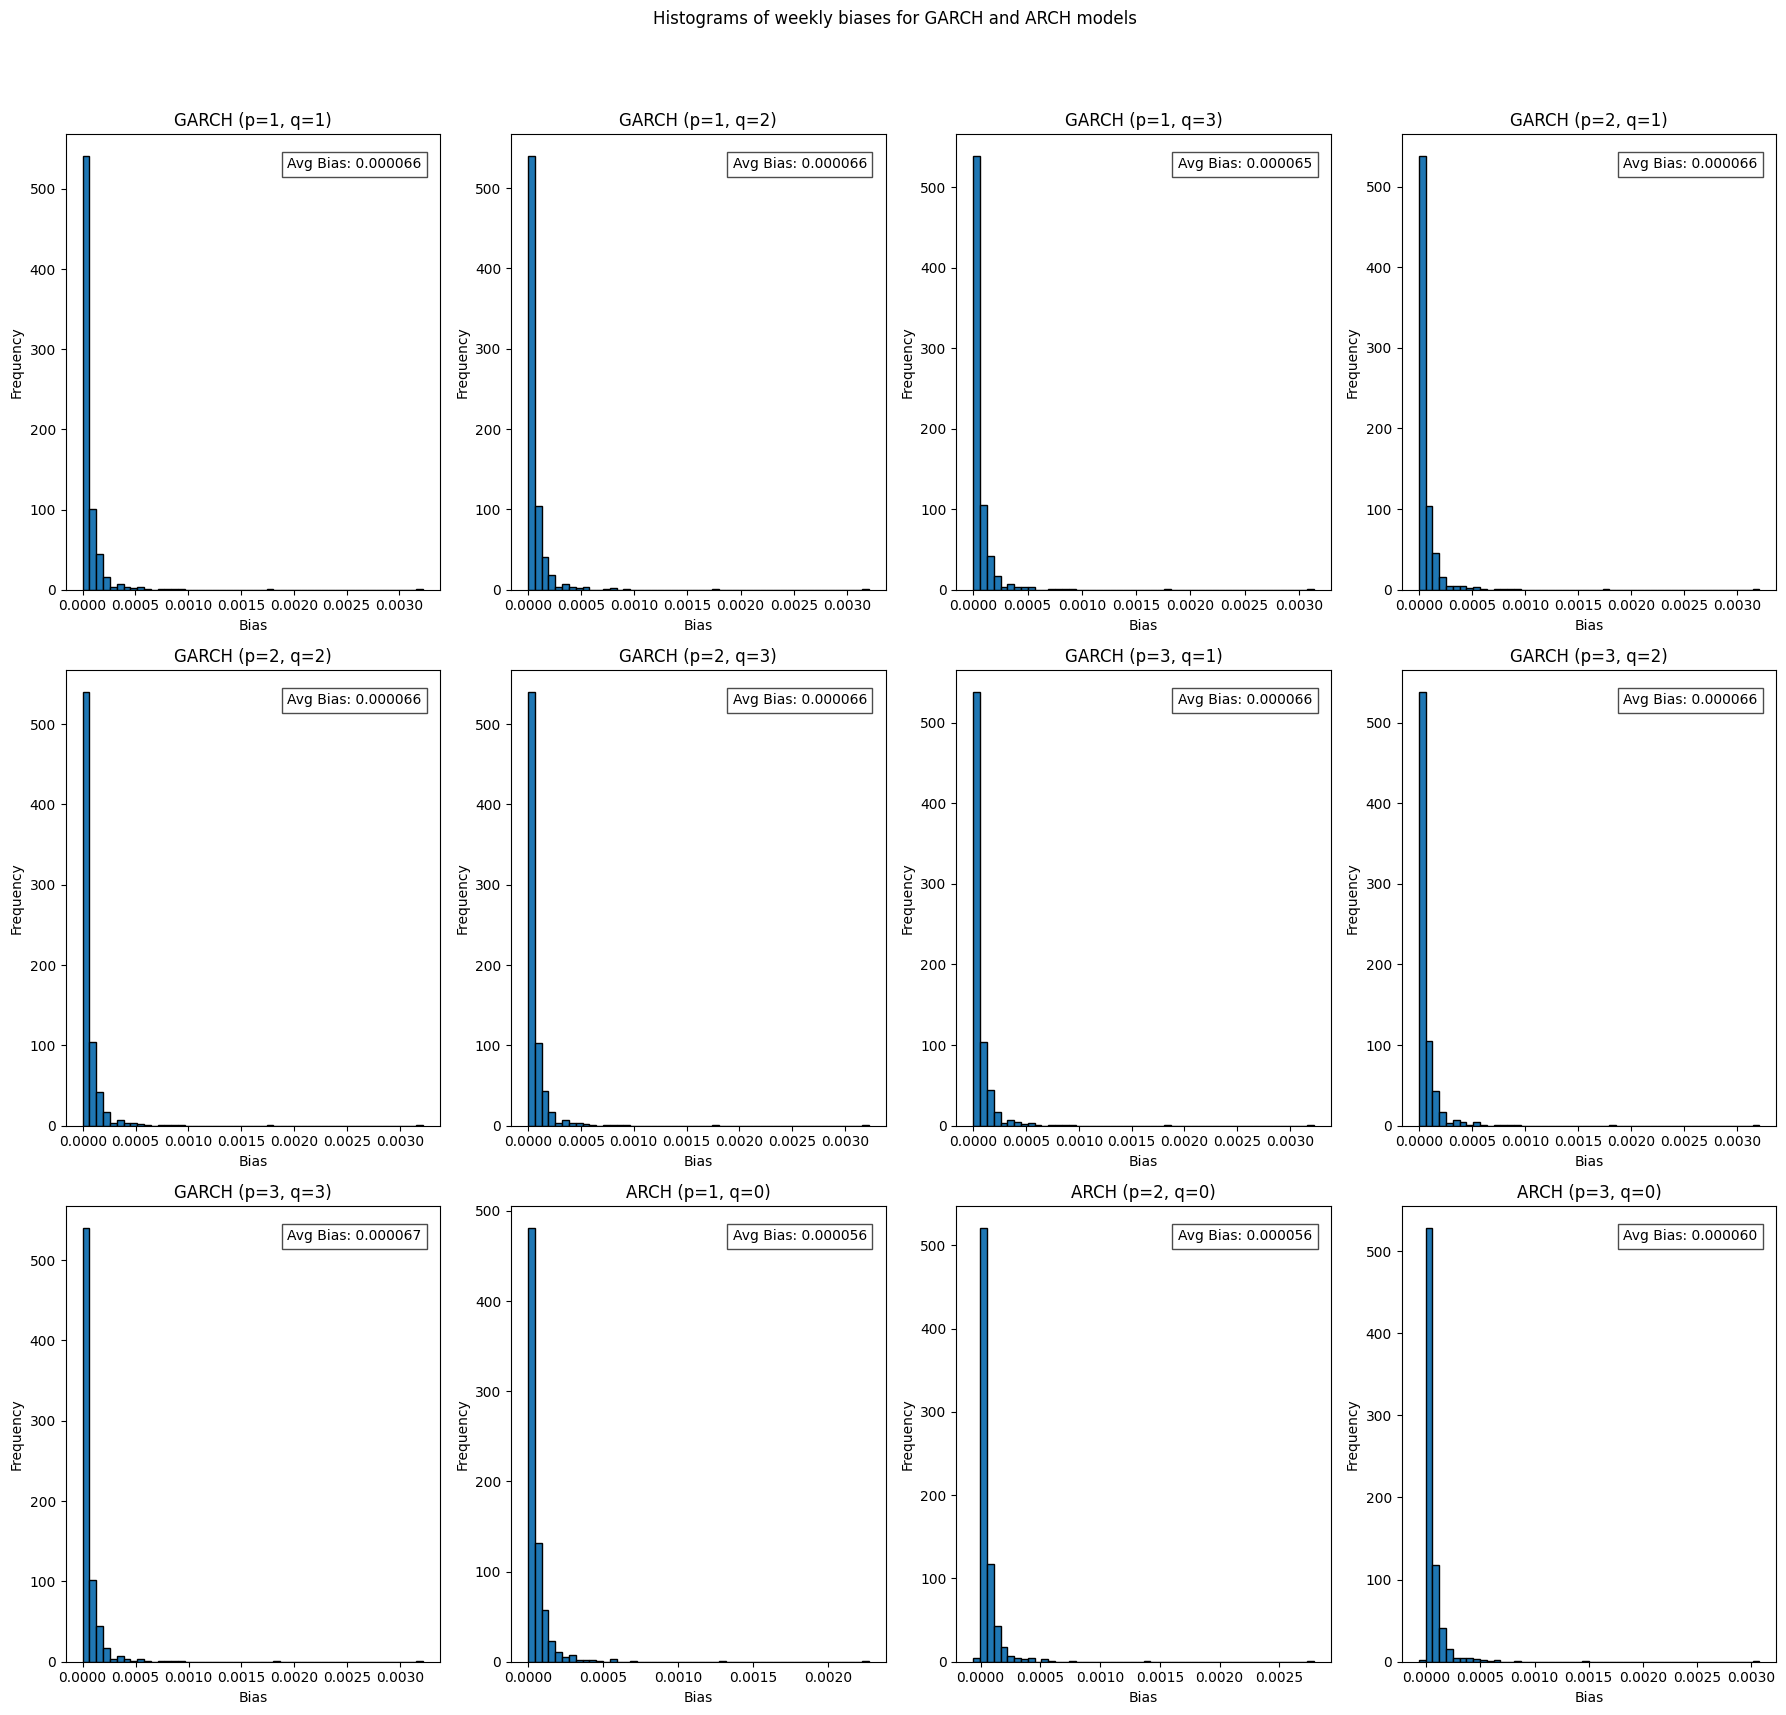

In [70]:
import warnings
warnings.filterwarnings("ignore")
def download_data(ticker='SPY', start='2000-01-01', end='2013-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close']]
    return data

# GARCH
def apply_garch_model(log_returns, p, q):
    p, q = int(p), int(q)
    model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# ARCH
def apply_arch_model(log_returns, p):
    p = int(p)
    model = arch_model(log_returns, vol='ARCH', p=p, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# weekly variance
def calculate_weekly_variance(volatility, index):
    volatility_series = pd.Series(volatility, index=index)
    var_weekly = volatility_series.resample('W').var()
    return var_weekly

# weekly bias
def calculate_weekly_bias(realized_vol, predicted_vol, index):
    var_realized_weekly = calculate_weekly_variance(realized_vol, index)
    var_predicted_weekly = calculate_weekly_variance(predicted_vol, index)
    bias_weekly = var_realized_weekly - var_predicted_weekly
    return bias_weekly

if __name__ == "__main__":
    data = download_data()
    
    log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
    
    realized_vol = log_returns.abs()
  
    results = []

    # GARCH for p, q in [1, 2, 3]
    for p in range(1, 4):
        for q in range(1, 4):
            predicted_vol_garch = apply_garch_model(log_returns, p, q)
            predicted_vol_garch = predicted_vol_garch[-len(realized_vol):]
            bias_weekly_garch = calculate_weekly_bias(realized_vol, predicted_vol_garch, realized_vol.index)
            avg_bias_garch = bias_weekly_garch.mean()
            results.append(('GARCH', p, q, avg_bias_garch))

    # ARCH for p in [1, 2, 3]
    for p in range(1, 4):
        predicted_vol_arch = apply_arch_model(log_returns, p)
        predicted_vol_arch = predicted_vol_arch[-len(realized_vol):]
        bias_weekly_arch = calculate_weekly_bias(realized_vol, predicted_vol_arch, realized_vol.index)
        avg_bias_arch = bias_weekly_arch.mean()
        results.append(('ARCH', p, 0, avg_bias_arch))

    results_df = pd.DataFrame(results, columns=['Model', 'p', 'q', 'Avg_Weekly_Bias'])
    
    print(results_df)

    num_models = len(results_df)
    num_cols = 4
    num_rows = (num_models + num_cols - 1) // num_cols 

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
    fig.suptitle('Histograms of weekly biases for GARCH and ARCH models')

    for index, (model, p, q, avg_bias) in enumerate(results):
        if model == 'GARCH':
            predicted_vol = apply_garch_model(log_returns, p, q)
        else:
            predicted_vol = apply_arch_model(log_returns, p)
        
        predicted_vol = predicted_vol[-len(realized_vol):]
        bias_weekly = calculate_weekly_bias(realized_vol, predicted_vol, realized_vol.index)
        
        ax = axs[index // num_cols, index % num_cols]
        ax.hist(bias_weekly.dropna(), bins=50, edgecolor='black')
        ax.set_title(f'{model} (p={p}, q={q})')
        ax.set_xlabel('Bias')
        ax.set_ylabel('Frequency')
        ax.text(0.95, 0.95, f'Avg Bias: {avg_bias:.6f}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Arch and garch variance

[*********************100%%**********************]  1 of 1 completed


    Model  p  q  Avg_Weekly_Variance
0   GARCH  1  1         7.864438e-07
1   GARCH  1  2         1.588483e-06
2   GARCH  1  3         2.357908e-06
3   GARCH  2  1         1.112587e-06
4   GARCH  2  2         1.094078e-06
5   GARCH  2  3         9.757249e-07
6   GARCH  3  1         7.981670e-07
7   GARCH  3  2         1.002683e-06
8   GARCH  3  3         6.245980e-07
9    ARCH  1  0         1.089090e-05
10   ARCH  2  0         1.076910e-05
11   ARCH  3  0         7.464606e-06


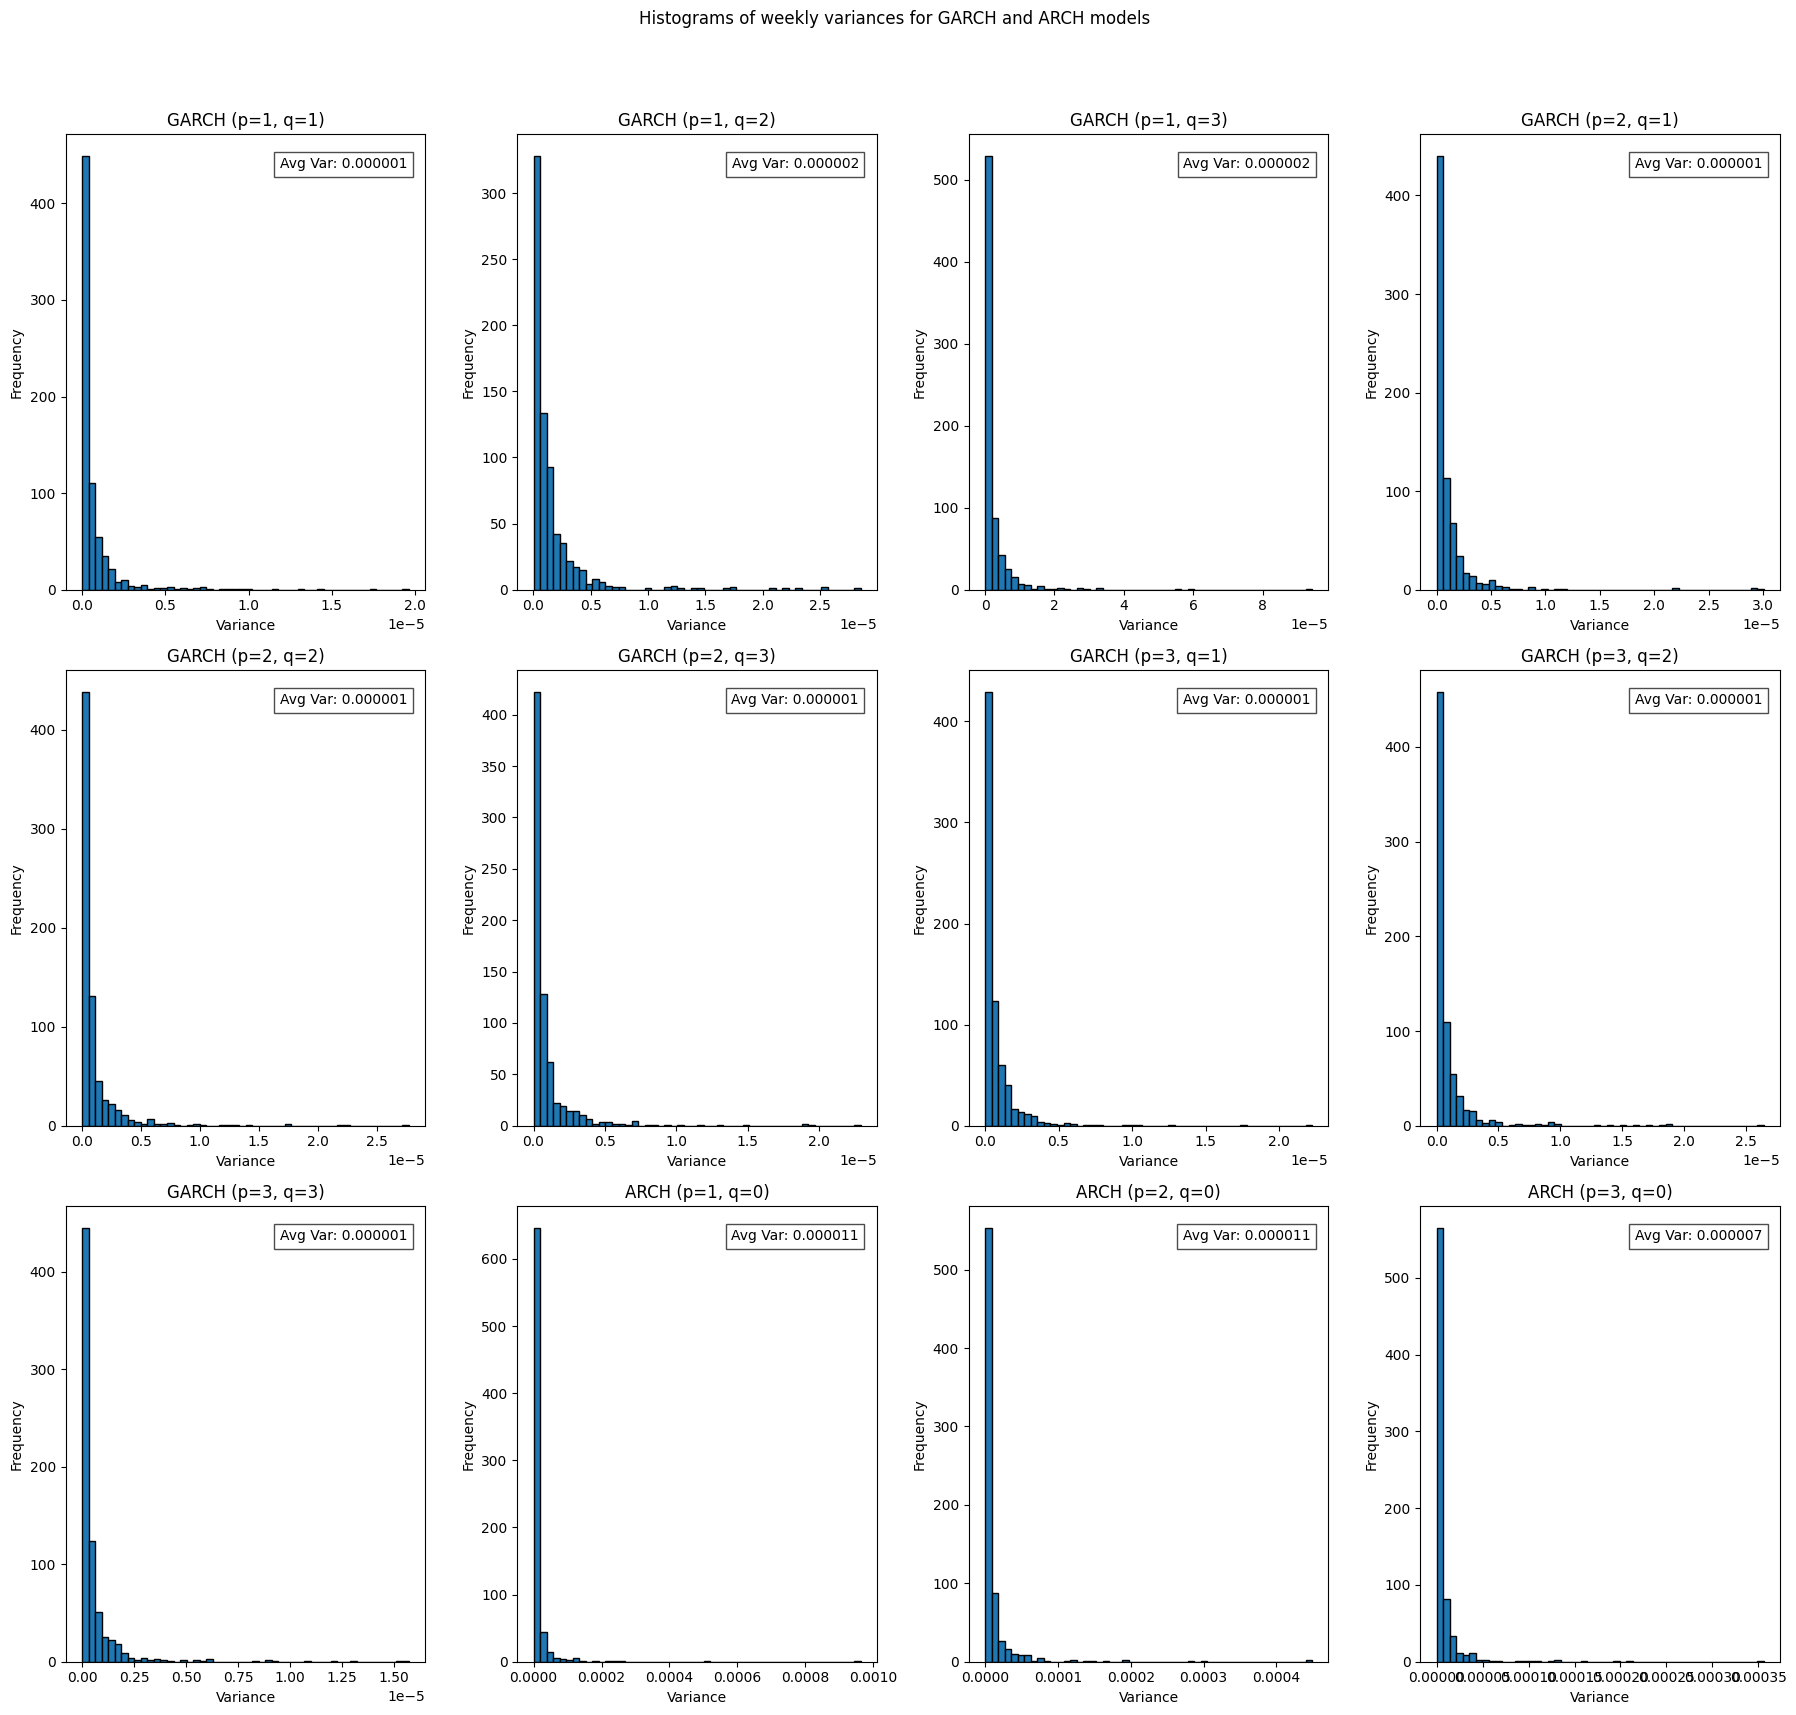

In [71]:

def download_data(ticker='SPY', start='2000-01-01', end='2013-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close']]
    return data

# GARCH
def apply_garch_model(log_returns, p, q):
    p, q = int(p), int(q)
    model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# ARCH
def apply_arch_model(log_returns, p):
    p = int(p) 
    model = arch_model(log_returns, vol='ARCH', p=p, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# weekly variance
def calculate_weekly_variance(volatility, index):
    volatility_series = pd.Series(volatility, index=index)
    var_weekly = volatility_series.resample('W').var()
    return var_weekly

if __name__ == "__main__":
    data = download_data()
    
    log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
    
    realized_vol = log_returns.abs()

    results = []

    # GARCH for p, q in [1, 2, 3]
    for p in range(1, 4):
        for q in range(1, 4):
            predicted_vol_garch = apply_garch_model(log_returns, p, q)
            predicted_vol_garch = predicted_vol_garch[-len(realized_vol):]
            var_weekly_garch = calculate_weekly_variance(predicted_vol_garch, realized_vol.index)
            avg_var_garch = var_weekly_garch.mean()
            results.append(('GARCH', p, q, avg_var_garch))

    # ARCH for p in [1, 2, 3]
    for p in range(1, 4):
        predicted_vol_arch = apply_arch_model(log_returns, p)
        predicted_vol_arch = predicted_vol_arch[-len(realized_vol):]
        var_weekly_arch = calculate_weekly_variance(predicted_vol_arch, realized_vol.index)
        avg_var_arch = var_weekly_arch.mean()
        results.append(('ARCH', p, 0, avg_var_arch))

    results_df = pd.DataFrame(results, columns=['Model', 'p', 'q', 'Avg_Weekly_Variance'])
    
    print(results_df)

    num_models = len(results_df)
    num_cols = 4
    num_rows = (num_models + num_cols - 1) // num_cols 

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
    fig.suptitle('Histograms of weekly variances for GARCH and ARCH models')

    for index, (model, p, q, avg_var) in enumerate(results):
        if model == 'GARCH':
            predicted_vol = apply_garch_model(log_returns, p, q)
        else:
            predicted_vol = apply_arch_model(log_returns, p)
        
        predicted_vol = predicted_vol[-len(realized_vol):]
        var_weekly = calculate_weekly_variance(predicted_vol, realized_vol.index)
        
        ax = axs[index // num_cols, index % num_cols]
        ax.hist(var_weekly.dropna(), bins=50, edgecolor='black')
        ax.set_title(f'{model} (p={p}, q={q})')
        ax.set_xlabel('Variance')
        ax.set_ylabel('Frequency')
        ax.text(0.95, 0.95, f'Avg Var: {avg_var:.6f}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()